## Infering Relationships Between Iris Species and their Characteristics

In [1]:
# Package Imports
import pandas as pd
import altair as alt
import sys
sys.path.append("../src")  
alt.renderers.enable('default')
import matplotlib.pyplot as plt
# from ucimlrepo import fetch_ucirepo
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform
from sklearn.metrics import ConfusionMatrixDisplay

## Summary

The Iris dataset consists of 150 samples of iris flowers, divided evenly into three species: setosa, versicolor, and virginica (50 samples each). Each observation contains four continuous morphological measurements: `sepal_length`, `sepal_width`, `petal_length`, and `petal_width`. All four features are recorded in centimetres. The dataset is well structured, with no missing values, and includes a balanced class distribution across the three species. A preliminary summary of the numerical features shows that values vary substantially between species; for example, setosa flowers tend to have smaller petal lengths (around 1.4 cm), while virginica flowers exhibit much larger petal dimensions. These clear differences suggest that the dataset is suitable for classification tasks, making it an ideal test case for evaluating machine learning models. In this project, we have developed a classification model using **Logistic Regression** to predict Iris flower species. based on four measurements: sepal length, sepal width, petal length, and petal width. A baseline **DummyClassifier** produced an accuracy of approximately `0.33` across cross-validation folds, confirming that the data is not trivially predictable and that a more sophisticated model is required. Before training the model, all numerical features were scaled using StandardScaler, ensuring that differences in measurement units did not disproportionately influence the classifier. After scaling features and performing hyperparameter tuning weith randomized search, our final **Logistic Regression classifier** achieved strong performance, with a training accuracy of `0.983` and a test accuracy of `0.90`. The confusion matrix indicates that the most predicitons were correct, with only a small number of misclassifications occuring between the **versicolor** and **virginica** classes reflectiong their natural feature similarity. Overall, the model demostrated high predicive performance on unseen data, though further refinement or more advnaced model could help reduce raiming classification overlap. 

## Introduction

A thorough understanding of the geographic distribution and traits of plants is invaluable to the development of sustainable agriculture and biodiversity conservation (Joly et al., 2014). Thus, as the demand for information and need for biodiversity grow, it becomes even more important that this task is one that can be performed efficiently and accurately (Thyagharajan & Kiruba Raji, 2018). One promising method through which this could be accomplished is machine learning classification.

The goal of this project is to explore how different physical measurements of iris flowers relate to species identity and to build a classification model that can accurately predict species based on these characteristics. The Iris dataset is a well-known benchmark in machine learning because it is clean, balanced, and contains clear biological differences among species. Each flower is described by four continuous measurements—sepal length, sepal width, petal length, and petal width—and belongs to one of three species: setosa, versicolor, or virginica.

Because these measurements reflect real morphological differences, the dataset provides a natural opportunity to study the relationship between flower structure and species classification. It also allows us to evaluate and compare machine learning models in a controlled environment. In this project, we perform exploratory data analysis to understand feature distributions and correlations, then develop a predictive model using Logistic Regression. We also include a DummyClassifier as a baseline to ensure that model performance improvements are meaningful rather than accidental.

Finally, we evaluate the model using cross-validation, hyperparameter tuning, and confusion-matrix diagnostics. This approach allows us to understand both how well the model learns from the training data and how reliably it generalizes to unseen samples. Overall, this project demonstrates the connection between biological measurements and species identity while providing a clear example of building, tuning, and interpreting a supervised classification model.

## Methods

#### Data

The dataset used in this project is the classic Iris flower dataset originally collected by the British statistician and biologist Ronald A. Fisher in 1936 as part of his research on linear discriminant analysis. It is publicly available through the UCI Machine Learning Repository, where it is widely used as a benchmark dataset for classification tasks. Each row in the dataset represents physical measurements of a single iris flower, including four numerical attributes sepal length, sepal width, petal length, and petal width recorded in centimetres. Alongside these measurements, each observation is labelled with one of three species (Iris setosa, Iris versicolor, or Iris virginica), originally identified by botanists through morphological characteristics. This dataset is clean, balanced, and well-suited for evaluating machine learning classification algorithms.

#### Analysis

In this step, we load the Iris dataset from an online source into a pandas DataFrame. We check for missing values to ensure the dataset is complete, view the first and last few rows to get a sense of the data structure, and look at the shape and data types to understand what kind of data we are working with.

In [3]:
# Data Import
from data_validation_iris import validate_iris_dataframe

iris = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")

iris = validate_iris_dataframe(iris)


# Check NA values, head, tail
display(
   iris.isna().sum(),
   iris.head(),
   iris.tail(),
   iris.shape,
   iris.dtypes,
   iris.describe()
)


=== RUNNING IRIS DATA VALIDATION CHECKS ===
Data loaded as pandas DataFrame.
Duplicate check passed (duplicates removed if present).
Schema validation passed.
Outlier check passed.
Species category level check passed (unknown categories removed if present).
Target Distribution check passed
Correlation check (features vs target) passed.
Correlation check (feature vs feature) passed.
=== IRIS DATA VALIDATION — ALL CHECKS PASSED ===



sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


(149, 5)

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631
std,0.830851,0.436342,1.767791,0.762622
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Data validation checks

- Correct data file format
  
- Correct column names as per schema
  
- No empty observations
  
- Missingness within expected thresholds
  
- Correct data types for each column
  
- No duplicate observations

- Values within expected ranges / valid categories

### Insights from Data

From the above code cells, we can see:

- The dataset has 150 rows and 5 columns.

- There are no missing values, so the data is complete.

- The dataset contains three species: Setosa, Versicolor, and Virginica.

- Petal measurements show the strongest separation between species.

- Setosa is clearly distinct, while Versicolor and Virginica overlap somewhat.

- Sepal measurements show smaller differences and are less useful for distinguishing species.

Scatter plot: 

This plot shows how the species are separated based on petal measurements. The three species form distinct clusters, indicating that these two features are good for classification. It also shows that Setosa is well-separated, while Versicolor and Virginica have some overlap.

In [18]:
alt.Chart(iris).mark_circle(size=120).encode(
    x=alt.X("petal_length", title="Petal Length (cm)"),
    y=alt.Y("petal_width", title="Petal Width (cm)"),
    color=alt.Color("species", title="Species"),
    tooltip=["species", "petal_length", "petal_width"]
).properties(
    width=500,
    height=400,
    title="Petal Length vs Petal Width by Species"
).interactive()

alt.Chart(...)

Boxplots: 

These plots show the distribution of each feature for different species. By comparing medians and ranges, we see that Setosa generally has smaller petals and sepals, while Virginica has the largest. This helps us understand the differences between species and why some features are better for classification.

In [19]:
features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
# EDA Boxplot
iris_melt = iris.melt(id_vars="species", var_name="feature", value_name="value")

display(
alt.Chart(iris_melt).mark_boxplot(size=40).encode(
    y=alt.Y("species:N", title="Species"),
    x=alt.X("value:Q", title="Measurement (cm)"),
    color=alt.Color("species:N", legend=None)
).properties(
    width=400,
    height=150
).facet(
    row=alt.Row("feature:N", title="Feature")
)
)

alt.FacetChart(...)

Correlation Heatmap: 

This plot shows how the numeric features are related to each other. We can see that petal length and petal width are highly correlated, while sepal length and sepal width have a weaker correlation. This suggests that petal measurements might be more useful for distinguishing species.

In [20]:

corr = iris.drop(columns="species").corr().stack().reset_index()
corr.columns = ["feature1", "feature2", "correlation"]

# Heatmap
heatmap = alt.Chart(corr).mark_rect().encode(
    x=alt.X("feature1:N", title="Feature"),
    y=alt.Y("feature2:N", title="Feature"),
    color=alt.Color("correlation:Q", scale=alt.Scale(scheme="redblue"), title="Correlation")
).properties(
    width=300,
    height=300,
    title="Correlation Heatmap of Iris Features"
)

# Add correlation values
text = alt.Chart(corr).mark_text(size=14).encode(
    x="feature1:N",
    y="feature2:N",
    text=alt.Text("correlation:Q", format=".2f"),
    color=alt.condition(
        "datum.correlation > 0.5",
        alt.value("white"),
        alt.value("black")
    )
)

display(heatmap + text)

alt.LayerChart(...)

## Results & Discussion

In our EDA, we observed that though the pedal attributes (length and width) show a higher level of interspecies distinction than the sepal attributes, all features exhibit an adequate amount of spread to be considered useful for our model. Additionally, our correlation matrix shows that sepal attributes are indeed correlated with petal attributes, increasing their utility to our model. After finding no conclusive evidence in support of dropping features from our model, we move forward with the full set of features from the dataset.

In [21]:
# Dropping species column to create feature matrix and target vector

X = iris.drop(columns = ['species'], axis=1)
y = iris['species']

The next step of the process consists of splitting the data into train and test. In this case a 80-20% split is being considered.

In [ ]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=522)

#iris_splitcheck = validate_iris_dataframe(X_train)

As a precautinary step, it is always beneficial to run the dummy model on the data to get the baseline accuracy. This aids in tuning the true regression model being used for training and prediction so that a balanced train-test score can be achieved.

In [23]:
# Using dummy classifier to test and get the worst baseline accuracy
dummy = DummyClassifier(strategy="most_frequent")   
cv_dummyscore = cross_validate(dummy, X_train, y_train, cv=5, return_train_score=True)
cv_dummyscore_df = pd.DataFrame(cv_dummyscore)
cv_dummyscore_df

,fit_time,score_time,test_score,train_score
0,0.000000,0.003762,0.333333,0.333333
1,0.003317,0.001594,0.333333,0.343750
2,0.001607,0.000000,0.333333,0.343750
3,0.000000,0.003634,0.333333,0.343750
4,0.000000,0.002883,0.333333,0.343750


In order to insert all the columns that require column transformations such as the StandardScaler(), we need to obtain all the feature columns from the dataset

In [24]:
features = X_train.columns.tolist()
features

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

The preprocessor is required and is a good practice before using the pipeline. The preprocessor consists of all the required transformations and the features on which they will be performed. We employ a classification model utilizing Logistic Regresison for this task, as we have a relatively small number of features in our model. This will also allow us to retain a higher level of interpretability in our model.

In [25]:
preprocessor = make_column_transformer(
    (StandardScaler(), features)
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

To optimize the model’s classification capabilities, we employ a randomized hyperparameter search. This will provide insight into what values of the C hyperparameter from logistic regression will perform best in our model.

In [26]:
# Hyperparameter tuning
param_grid = {
    "classifier__C": loguniform(1e-6, 1e6)
}

rand_search = RandomizedSearchCV(
    pipeline,
    param_grid,
    n_iter = 50,
    cv = 5,
    n_jobs = -1,
    random_state = 522
)

rand_search.fit(X_train, y_train)

results = pd.DataFrame(rand_search.cv_results_)
results = results.sort_values(by = 'mean_test_score', ascending = False)

display(results.head(10)[[
    'param_classifier__C',
    'mean_test_score',
    'std_test_score'
]])

,param_classifier__C,mean_test_score,std_test_score
9,2.054645,0.983333,0.020412
5,1.905181,0.983333,0.020412
16,3.753517,0.983333,0.020412
13,3.621417,0.983333,0.020412
25,2.905520,0.983333,0.020412
3,1.712861,0.975000,0.020412
19,23.844633,0.975000,0.020412
24,36.500918,0.975000,0.020412
15,14.062606,0.975000,0.020412
7,620.951562,0.966667,0.016667


We see that most of our highest-performing models have a C hyperparameter value in the rough range of 1.75 to 3.75, signalling that this is our optimal range. Next, we will test our optimized model on our testing data from our initial train/test data split, allowing us to observe how well our model generalizes to unseen data.

In [27]:
best_model = rand_search.best_estimator_
print("Train accuracy:", best_model.score(X_train, y_train))
print("Test accuracy:", best_model.score(X_test, y_test))

Train accuracy: 0.9833333333333333
Test accuracy: 0.9


For greater context around these figures, we will plot an ROC curve.

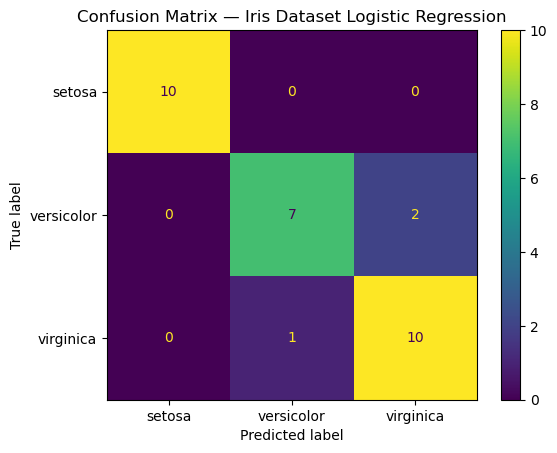

In [28]:
disp = ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
plt.title("Confusion Matrix — Iris Dataset Logistic Regression")
plt.show()

Achieving a training score of 0.98, it is evident that the model was able to learn the relationships between the four iris measurements. Additionally, the model generalizes to the unseen data quite well, yielding a test score of 0.9. While the discrepancy between the model's train and test scores elicit some concern around potential overfitting in the model, it is not large enough to overshadow its strong generalization capabilities.

These findings imply that the four measured flower characteristics are strong predictors that could reliably enhance species identification. Future questions could explore whether more complex models could grow accuracy even further or whether certain species pairs remain more difficult to separate due to particular traits. Overall, it appears that this model is well on its way to becoming a strong tool for iris identification.

## References

Fisher, R. (1936). Iris [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C56C76.

Thyagharajan, K. K., & Kiruba Raji, I. (2018). A Review of Visual Descriptors and Classification Techniques Used in Leaf Species Identification. Archives of Computational Methods in Engineering, 26(4), 933–960. https://doi.org/10.1007/s11831-018-9266-3

Joly, A., Goëau, H., Bonnet, P., Bakić, V., Barbe, J., Selmi, S., Yahiaoui, I., Carré, J., Mouysset, E., Molino, J.-F., Boujemaa, N., & Barthélémy, D. (2014). Interactive Plant Identification Based on Social Image Data. Ecological Informatics, 23, 22–34. https://doi.org/10.1016/j.ecoinf.2013.07.006 

Yanikoglu, B., Aptoula, E., & Tirkaz, C. (2014). Automatic Plant Identification from Photographs. Machine Vision and Applications, 25(6), 1369–1383. https://doi.org/10.1007/s00138-014-0612-7 